In [5]:
import numpy as np

In [6]:
class SVM:
    """
    A support vector machine is a type of ML algorithm used for classification and regression analysis.
    It is a supervised learning method. It finds an hyperplane that separates data into classes.
    The SVM finds the hyperplane that maximizes the margin, which is the distance between the closest data points
    (support vectors) from each class.

    SVM can treat non-linearly separable data (e.g., circular boundaries) by using the kernel trick.
    The kernel trick transforms the input features into higher-dimensional space allowing the SVM to find an
    hyperplane that separate the classes in this higher-dimensional space.

    The kernel tricks are:
      Linear kernel
      Polynomial kernel
      Radial basis function (RBF)
      Sigmoid kernel
      Laplacian kernel
    
    In this code we won´t be using any of those tricks.
    """

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None #Better to start with none as it is generic
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape #rows, columns

        self.w = np.zeros(n_features) #weights is the size of parameters (columns) to adjust the model
        self.b = 0

        for _ in range(self.n_iters): #Start gradient descent
            for idx, x_i in enumerate(X): #For each example
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1 #Check the condition to see the category boundary
                #These conditions and the ongoing formulas are obtained from the Theory of SVM.
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]

    def predict(self, X):
        """
        Once the model is fitted (trained) we predict the categorization of the data with the weights and bias.
        """
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)

In [7]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

"""
Note:

We can solve the exercise without pandas. Nonetheless, we use it to see it and modify it easier.
"""

df=pd.DataFrame(data.data, columns=data.feature_names)
df["target"]=data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [10]:
svm = SVM()
svm.fit(X_train, y_train)

y_pred_train = svm.predict(X_train)
train_acc = np.mean(y_pred_train == y_train)

y_pred_test = svm.predict(X_test)
test_acc = np.mean(y_pred_test == y_test)

print("Training accuracy:", train_acc)
print("Testing accuracy:", test_acc)

#We observe that the testing accuracy is slightly higher than the training. Ask why. Try folding the dataset.

Training accuracy: 0.6256281407035176
Testing accuracy: 0.631578947368421


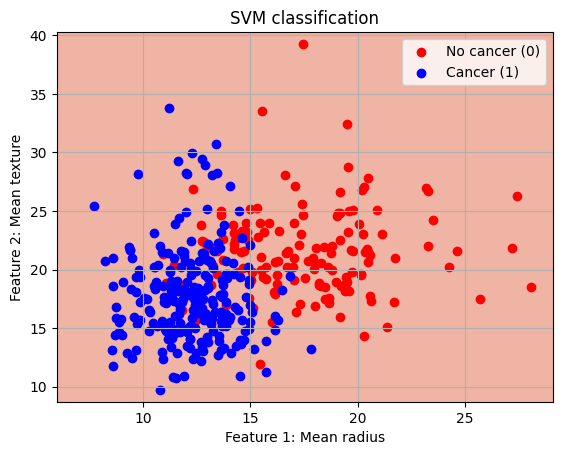

In [16]:
"""
Let´s plot the hyperplane using only 2 input features.
"""

import matplotlib.pyplot as plt

# We select the first and second features
X = X[:, :2]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM
svm = SVM()
svm.fit(X_train, y_train)

# Plot the classification

"""
We create a meshgrid of points for the input features
X[feature1] (i.e., x) and X[feature2] (i.e., y) and set its limits.
These limits define the range of the meshgrid that we create to plot
the decision boundary. The limits are set to ensure that all data points
are visible and not cut off by the edges of the plot.
"""

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a meshgrid of points
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

"""
meshgrid function is used to create a grid of points from two arrays of x and y
coordinates. It creates a set of points with coordinates xx and yy set by the
arguments of the meshgrid (a,b) respectively, i.e., a meshgrid from x_min to
x_max with 500 points (xx) and respectively for yy.
"""

# Flatten the meshgrid to pass as input to svm.predict()
X_grid = np.c_[xx.ravel(), yy.ravel()]

"""
xx.ravel(): method that returns a flattened (1-D) array of the same elements
as the original multi-dimensional xx but reshaped in a single row. The resulting
array is concatenated with the second one and so on. In our case xx and yy were
matrices of 2D arrays with shape (500,500). 

np.c_: concatenates two arrays (our flattened arrays xx and yy) along column-wise.

After this, we have a 2-D array with shape (n_samples, 2) being n_samples the total
number of points in the meshgrid and 2 the number of features from the dataset
(i.e., each sample has two features).
"""

# Use svm.predict() to get the predicted values for each point in the grid
Z = svm.predict(X_grid)

# Reshape the predicted values into a 2D array
Z = Z.reshape(xx.shape)

"""
Now Z is a 1-D array.

xx was originally a 2D array of shape (n_samples, n_features)
n_samples: number of points in the meshgrid
n_features: 2 in this case

Reshaping Z to (n_samples, n_features) allows us to plot
the decision boundary using contour function.
"""

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.6)

# Plot the training data
#plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolors='k', label={0:"0", 1:"1"})
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='r', label='Bening (non-cancerous) (0)')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='b', label='Malignant (cancerous) (1)')
plt.legend(loc='upper right')

"""
We can observe in the plot a curiosity. When the radious of the cancer is bigger, it does not
necessarily mean that the cancer is malignant. Nonetheless, there are 30 more features that
determine the output category of each example.

The hyperplane cannot be observed because we are in a 2D plot. The plane crosses all
over the dataset.
"""

plt.title("SVM classification")
plt.xlabel("Feature 1: Mean radius")
plt.ylabel("Feature 2: Mean texture")
plt.legend()
plt.grid()
plt.show()

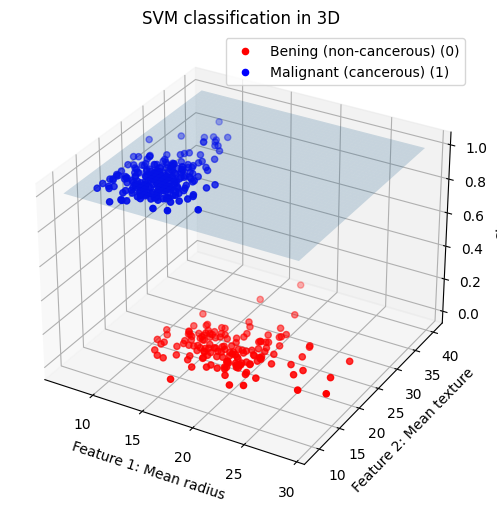

In [43]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Define the meshgrid over the feature space
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict the value of the hyperplane for each point in the meshgrid
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted values to match the shape of the meshgrid
Z = Z.reshape(xx.shape)

# Plot the hyperplane as a surface in 3D
ax.plot_surface(xx, yy, Z, alpha=0.2)

# Plot the training data points
ax.scatter(xs=X_train[y_train==0, 0], ys=X_train[y_train==0, 1], zs=y_train[y_train==0], c='r', label='Bening (non-cancerous) (0)')
ax.scatter(xs=X_train[y_train==1, 0], ys=X_train[y_train==1, 1], zs=y_train[y_train==1], c='b', label='Malignant (cancerous) (1)')
ax.legend(loc='upper right')

"""
Observe that as we are in a 2D plot, we have to specify the zs variable with its corresponding values,
otherwise it will scatter the two blobs into the z=0 value and the hyperplane at 0.9.
"""

"""
DISCLAIMER:

I am not completely sure about the plane. It seems that the accuracy is 100%. Nonetheless, with
training and test datasets we saw an accuracy of 60%. Here we created a meshgrid with the training
dataset, predicted the category of this meshgrid and plotted the training dataset with the hyperplane of the meshgrid.

I have to repeat the SVM class to return the coefficients of the hyperplane and find a way that returns
better information. I don´t think this last part is correct.
"""

ax.set_title("SVM classification in 3D")
ax.set_xlabel("Feature 1: Mean radius")
ax.set_ylabel("Feature 2: Mean texture")
ax.set_zlabel("Class")
plt.show()
